# Dissecting Spotify Valence - Assignment  Practical Data Science

---

> Nikos Tsoukalelis, Data Science Part Time student <br />
> Athens University of Economics and Business <br />
> ntsoukalelis@aueb.gr

## Q1:

###  Expore which Track Features Influence Valence

> We will start by importing basic libraries for our work.
> <br> Then we will install spotipy

In [1]:
import os 
import numpy as np
import scipy.stats.stats as stats

In [2]:
pip install spotipy

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

import glob
import re
from datetime import datetime

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

> After that we set the clientI_id and client_secret that had created from the spotify https://developer.spotify.com/dashboard/login web-page by creating my dashboard
> <br> I used a file .py (spotify_config.py) to store the two passwords so it reads them from it.

In [4]:
from spotify_config import config

client_credentials_manager = SpotifyClientCredentials(config['client_id'],
                                                      config['client_secret'])
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
#sp.trace = False

> Then we use the dataset that was shown in the lectures to retrieve the data (song_ids) we will use later in our project.
> <br> The data were downloaded from the web-page  https://doi.org/10.5281/zenodo.4778562.
> <br> After downloading we create the dataframe with all the songs from the charts of the countries provided by the site (even if there are dublicates)

In [5]:
header = 0
dfs = []
for file in glob.glob('Charts/*/201?/*.csv'):
    region = file.split('\\')[1]
    dates = re.findall('\d{4}-\d{2}-\d{2}', file.split('/')[-1])
    weekly_chart = pd.read_csv(file, header=header, sep='\t')
    weekly_chart['week_start'] = datetime.strptime(dates[0], '%Y-%m-%d')
    weekly_chart['week_end'] = datetime.strptime(dates[1], '%Y-%m-%d')
    weekly_chart['region'] = region
    dfs.append(weekly_chart)

all_charts = pd.concat(dfs)
all_charts

,position,song_id,song_name,artist,streams,last_week_position,weeks_on_chart,peak_position,position_status,week_start,week_end,region
0,1,5aAx2yezTd8zXrkmtKl66Z,Starboy,The Weeknd,947261,NaN,1,1,new,2016-12-30,2017-01-06,au
1,2,5knuzwU65gJK7IF5yJsuaW,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,893107,NaN,1,2,new,2016-12-30,2017-01-06,au
2,3,7BKLCZ1jbUBVqRi2FVlTVw,Closer,The Chainsmokers,871617,NaN,1,3,new,2016-12-30,2017-01-06,au
3,4,3NdDpSvN911VPGivFlV5d0,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,791592,NaN,1,4,new,2016-12-30,2017-01-06,au
4,5,78rIJddV4X0HkNAInEcYde,Call On Me - Ryan Riback Extended Remix,Starley,743490,NaN,1,5,new,2016-12-30,2017-01-06,au
...,...,...,...,...,...,...,...,...,...,...,...,...
195,196,7f5trao56t7sB7f14QDTmp,Juicy,Doja Cat,1920454,146.0,8,66,-50,2019-12-20,2019-12-27,us
196,197,5JiH89mHrv9oWHlD0T326z,To Be So Lonely,Harry Styles,1912267,32.0,2,32,-165,2019-12-20,2019-12-27,us
197,198,7GX5flRQZVHRAGd6B4TmDO,XO Tour Llif3,Lil Uzi Vert,1902239,154.0,121,2,-44,2019-12-20,2019-12-27,us
198,199,2dpaYNEQHiRxtZbfNsse99,Happier,Marshmello,1899623,173.0,71,8,-26,2019-12-20,2019-12-27,us


> Checking the number of the unique song_ids available in the dataset we extracted

In [6]:
len(all_charts['song_id'].unique())

13880

> Saving to csv to have an extra check on the data

In [7]:
all_charts.to_csv('charts.csv')

> Next step is to create a blank list with the features and a list with allo the unique song_ids from our dataset.
> <br> This is done so we can scrape from the Spotify API the ids that are in that list, that is we will use that list as a lookup

In [8]:
features = {}
all_track_ids = list(all_charts['song_id'].unique())
#analysis = {}
#all_track_ids2 = list(all_charts['song_id'].unique())

> Now using the API for the Spotify features we get the features for the specific song_ids we had downloaded from the top charts.
> <br> We use iteration to stop every 100 so there won't be a limitation from Spotify in our downloading

In [9]:
start = 0
num_tracks = 100
while start < len(all_track_ids):
    print(f'getting from {start} to {start+num_tracks}')
    tracks_batch = all_track_ids[start:start+num_tracks]
    features_batch = sp.audio_features(tracks_batch)
    features.update({ track_id : track_features 
                     for track_id, track_features in zip(tracks_batch, features_batch) })
    start += num_tracks

getting from 0 to 100
getting from 100 to 200
getting from 200 to 300
getting from 300 to 400
getting from 400 to 500
getting from 500 to 600
getting from 600 to 700
getting from 700 to 800
getting from 800 to 900
getting from 900 to 1000
getting from 1000 to 1100
getting from 1100 to 1200
getting from 1200 to 1300
getting from 1300 to 1400
getting from 1400 to 1500
getting from 1500 to 1600
getting from 1600 to 1700
getting from 1700 to 1800
getting from 1800 to 1900
getting from 1900 to 2000
getting from 2000 to 2100
getting from 2100 to 2200
getting from 2200 to 2300
getting from 2300 to 2400
getting from 2400 to 2500
getting from 2500 to 2600
getting from 2600 to 2700
getting from 2700 to 2800
getting from 2800 to 2900
getting from 2900 to 3000
getting from 3000 to 3100
getting from 3100 to 3200
getting from 3200 to 3300
getting from 3300 to 3400
getting from 3400 to 3500
getting from 3500 to 3600
getting from 3600 to 3700
getting from 3700 to 3800
getting from 3800 to 3900
getting

> After that we input the data in a dataframe called tracks.
< <br> So now we have stored every feature for the specific ids and also the one we are going to need as our dependent variable in our project: "valence"

In [10]:
tracks = pd.DataFrame.from_dict(features, orient='index')
tracks =tracks.reset_index().rename(columns={'index' : 'song_id'})
tracks

,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,5aAx2yezTd8zXrkmtKl66Z,0.681,0.594,7,-7.028,1,0.2820,0.16500,0.000003,0.1340,0.5350,186.054,audio_features,5aAx2yezTd8zXrkmtKl66Z,spotify:track:5aAx2yezTd8zXrkmtKl66Z,https://api.spotify.com/v1/tracks/5aAx2yezTd8z...,https://api.spotify.com/v1/audio-analysis/5aAx...,230453,4
1,5knuzwU65gJK7IF5yJsuaW,0.720,0.763,9,-4.068,0,0.0523,0.40600,0.000000,0.1800,0.7420,101.965,audio_features,5knuzwU65gJK7IF5yJsuaW,spotify:track:5knuzwU65gJK7IF5yJsuaW,https://api.spotify.com/v1/tracks/5knuzwU65gJK...,https://api.spotify.com/v1/audio-analysis/5knu...,251088,4
2,7BKLCZ1jbUBVqRi2FVlTVw,0.748,0.524,8,-5.599,1,0.0338,0.41400,0.000000,0.1110,0.6610,95.010,audio_features,7BKLCZ1jbUBVqRi2FVlTVw,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,https://api.spotify.com/v1/tracks/7BKLCZ1jbUBV...,https://api.spotify.com/v1/audio-analysis/7BKL...,244960,4
3,3NdDpSvN911VPGivFlV5d0,0.735,0.451,0,-8.374,1,0.0585,0.06310,0.000013,0.3250,0.0862,117.973,audio_features,3NdDpSvN911VPGivFlV5d0,spotify:track:3NdDpSvN911VPGivFlV5d0,https://api.spotify.com/v1/tracks/3NdDpSvN911V...,https://api.spotify.com/v1/audio-analysis/3NdD...,245200,4
4,78rIJddV4X0HkNAInEcYde,0.670,0.838,0,-4.031,1,0.0362,0.06040,0.000611,0.1590,0.7170,104.998,audio_features,78rIJddV4X0HkNAInEcYde,spotify:track:78rIJddV4X0HkNAInEcYde,https://api.spotify.com/v1/tracks/78rIJddV4X0H...,https://api.spotify.com/v1/audio-analysis/78rI...,222041,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13875,3aQV6E290SJvasp2VOgvBz,0.810,0.690,10,-7.841,0,0.2700,0.03730,0.000000,0.1060,0.6180,139.970,audio_features,3aQV6E290SJvasp2VOgvBz,spotify:track:3aQV6E290SJvasp2VOgvBz,https://api.spotify.com/v1/tracks/3aQV6E290SJv...,https://api.spotify.com/v1/audio-analysis/3aQV...,140369,4
13876,43YQDj1KOPMFAUcTEPKy4p,0.942,0.531,1,-7.510,1,0.2150,0.00236,0.000106,0.0812,0.7400,99.027,audio_features,43YQDj1KOPMFAUcTEPKy4p,spotify:track:43YQDj1KOPMFAUcTEPKy4p,https://api.spotify.com/v1/tracks/43YQDj1KOPMF...,https://api.spotify.com/v1/audio-analysis/43YQ...,157520,4
13877,1985nAkGJf1oOrgHCWftoN,0.762,0.679,4,-7.595,0,0.1920,0.04260,0.000000,0.1860,0.3280,150.051,audio_features,1985nAkGJf1oOrgHCWftoN,spotify:track:1985nAkGJf1oOrgHCWftoN,https://api.spotify.com/v1/tracks/1985nAkGJf1o...,https://api.spotify.com/v1/audio-analysis/1985...,125320,4
13878,7ntUbTIwmwOD6ygCMRZT6e,0.774,0.836,9,-2.323,0,0.1520,0.28800,0.000024,0.0824,0.4940,112.014,audio_features,7ntUbTIwmwOD6ygCMRZT6e,spotify:track:7ntUbTIwmwOD6ygCMRZT6e,https://api.spotify.com/v1/tracks/7ntUbTIwmwOD...,https://api.spotify.com/v1/audio-analysis/7ntU...,201271,4


> Importing libraries and tools we will need later on 

In [11]:
from statsmodels.formula.api import logit
import statsmodels.formula.api as smf
from statsmodels.iolib.summary2 import summary_col
import statsmodels.api as sm
from functools import reduce

In [12]:
tracks.to_csv('tracks.csv')

> As our first task we want to check the linear regression model and if that could apply to our data and which seem to be the best predictors for the dependent variable (valence)
><br> Running the linear regression.
><br> After that we take from the regression summary only the p-values to check the importance of the parameters (predictors) regarding valence.

In [13]:
valence_mod_linear=smf.ols("valence ~ danceability + energy +	key + loudness + mode +	speechiness + acousticness + instrumentalness + liveness + tempo + type + duration_ms + time_signature"
                           ,data=tracks)

valence_mod_linear_res = valence_mod_linear.fit()
res_linear=valence_mod_linear_res.summary()
#Converting the results table into a data frame
results_as_html = res_linear.tables[1].as_html()
linear_result_valence=pd.read_html(results_as_html, header=0, index_col=0)[0]
#Reseting the index to make it as a column and deleting the columns I do not need
linear_result_valence.reset_index(level=0, inplace=True)
linear_result_valence=linear_result_valence.drop(['std err', 't', '[0.025','0.975]'], axis=1)

> Showing the full summary of the linear regression model

In [14]:
res_linear

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     357.4
Date:                Sun, 09 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:10:02   Log-Likelihood:                 3542.2
No. Observations:               13880   AIC:                            -7058.
Df Residuals:                   13867   BIC:                            -6960.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.2070      0.030     -6.885      0.000      -0.266      -0.148
danceability         0.3997      0.012     33.271      0.000       0.376       0.423
energy               0.6026      0.015     39.441      0.000       0.573       0.632
key                  0.0022      0.000      4.847      0.000       0.001       0.003
loudness            -0.0024      0.001     -2.350      0.019      -0.004      -0.000
mode                 0.0054      0.003      1.634      0.102      -0.001       0.012
speechiness         -0.1173      0.013     -9.302      0.000      -0.142      -0.093
acousticness         0.1734      0.008     22.446      0.000       0.158       0.189
instrumentalness    -0.1587      0.027     -5.929      0.000      -0.211      -0.106
liveness             0.0487      0.011      4.538      0.000       0.028       0.070
tempo                0.0002   5.72e-05      3.996      0.000       0.000       0.000
duration_ms      -2.897e-07   3.27e-08     -8.861      0.000   -3.54e-07   -2.26e-07
time_signature       0.0012      0.005      0.218      0.827      -0.009       0.012
==============================================================================
Omnibus:                      141.031   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.882
Skew:                           0.014   Prob(JB):                     3.04e-20
Kurtosis:                       2.607   Cond. No.                     4.25e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.25e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

> Showing the p-values

In [15]:
pd.set_option("display.precision", 4)
pd.set_option('display.float_format', lambda x: '%8.2f' % x)
linear_result_valence

,index,coef,P>|t|
0,Intercept,-0.21,0.00
1,danceability,0.40,0.00
2,energy,0.60,0.00
3,key,0.00,0.00
4,loudness,-0.00,0.02
5,mode,0.01,0.10
6,speechiness,-0.12,0.00
7,acousticness,0.17,0.00
8,instrumentalness,-0.16,0.00
9,liveness,0.05,0.00


> Then I ran also a logistic regression model to see if that improves our model

In [16]:
valence_mod_log=logit("valence ~ danceability + energy + key + loudness + mode + speechiness + acousticness + instrumentalness + liveness + tempo + type + duration_ms + time_signature"
                           ,data=tracks)

valence_mod_log_res = valence_mod_log.fit()
res_log=valence_mod_log_res.summary2()
#Converting the results table into a data frame
log_result_valence = (valence_mod_log_res.summary2().tables[1])
type(log_result_valence)
#log_result_valence=pd.read_html(results_as_html1, header=0, index_col=0)[0]
#Reseting the index to make it as a column and deleting the columns I do not need
log_result_valence.reset_index(level=0, inplace=True)
log_result_valence=log_result_valence.drop(['Std.Err.','z','[0.025','0.975]'], axis=1)

Optimization terminated successfully.
         Current function value: 0.653445
         Iterations 5


> Showing the summary of the logistic regression

In [17]:
res_log

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            Pseudo R-squared: 0.057      
Dependent Variable: valence          AIC:              18165.6389 
Date:               2022-01-09 21:10 BIC:              18263.6356 
No. Observations:   13880            Log-Likelihood:   -9069.8    
Df Model:           12               LL-Null:          -9618.9    
Df Residuals:       13867            LLR p-value:      1.3821e-227
Converged:          1.0000           Scale:            1.0000     
No. Iterations:     5.0000                                        
------------------------------------------------------------------
                    Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------
Intercept          -2.9804   0.3365 -8.8568 0.0000 -3.6399 -2.3208
danceability        1.6878   0.1332 12.6733 0.0000  1.4268  1.9488
energy              2.5129   0.1694 14.8336 0.0000  2.1808  2.8449
key                 0.0090   0.0049  1.8488 0.0645 -0.0005  0.0185
loudness           -0.0085   0.0112 -0.7655 0.4440 -0.0304  0.0133
mode                0.0223   0.0359  0.6212 0.5344 -0.0481  0.0927
speechiness        -0.4799   0.1376 -3.4876 0.0005 -0.7496 -0.2102
acousticness        0.7218   0.0853  8.4621 0.0000  0.5546  0.8889
instrumentalness   -0.7361   0.3122 -2.3575 0.0184 -1.3480 -0.1241
liveness            0.2069   0.1181  1.7522 0.0797 -0.0245  0.4383
tempo               0.0010   0.0006  1.5768 0.1148 -0.0002  0.0022
duration_ms        -0.0000   0.0000 -3.3970 0.0007 -0.0000 -0.0000
time_signature      0.0114   0.0605  0.1888 0.8502 -0.1072  0.1300
==================================================================

"""

> Showing the p-values for the log regression

In [18]:
log_result_valence

,index,Coef.,P>|z|
0,Intercept,-2.98,0.00
1,danceability,1.69,0.00
2,energy,2.51,0.00
3,key,0.01,0.06
4,loudness,-0.01,0.44
5,mode,0.02,0.53
6,speechiness,-0.48,0.00
7,acousticness,0.72,0.00
8,instrumentalness,-0.74,0.02
9,liveness,0.21,0.08


> We notice that probably the multiple linear regression model would explain better the dependent variable but we need to proceed to the right features selection.
> Firtsly dropping the columns that are not needed for predicting the valence.

In [19]:
tracks=tracks.drop(['song_id','type','id','uri','track_href','analysis_url'], axis=1)

In [20]:
tracks

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.68,0.59,7,-7.03,1,0.28,0.17,0.00,0.13,0.54,186.05,230453,4
1,0.72,0.76,9,-4.07,0,0.05,0.41,0.00,0.18,0.74,101.97,251088,4
2,0.75,0.52,8,-5.60,1,0.03,0.41,0.00,0.11,0.66,95.01,244960,4
3,0.73,0.45,0,-8.37,1,0.06,0.06,0.00,0.33,0.09,117.97,245200,4
4,0.67,0.84,0,-4.03,1,0.04,0.06,0.00,0.16,0.72,105.00,222041,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13875,0.81,0.69,10,-7.84,0,0.27,0.04,0.00,0.11,0.62,139.97,140369,4
13876,0.94,0.53,1,-7.51,1,0.21,0.00,0.00,0.08,0.74,99.03,157520,4
13877,0.76,0.68,4,-7.59,0,0.19,0.04,0.00,0.19,0.33,150.05,125320,4
13878,0.77,0.84,9,-2.32,0,0.15,0.29,0.00,0.08,0.49,112.01,201271,4


> Also we see that our data are not normalised (e.g duration in ms has some really big values that are not compareable with other features).
> <br> So we normalise the data using zscore

In [21]:
tracks_z = tracks.select_dtypes(include=[np.number]).dropna().apply(stats.zscore)
tracks_z

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,-0.05,-0.44,0.45,-0.30,0.94,0.98,-0.36,-0.13,-0.32,0.15,2.27,0.46,0.07
1,0.23,0.60,1.00,0.93,-1.06,-0.77,0.68,-0.13,-0.01,1.11,-0.73,0.88,0.07
2,0.43,-0.88,0.73,0.29,0.94,-0.92,0.71,-0.13,-0.47,0.73,-0.97,0.75,0.07
3,0.34,-1.33,-1.47,-0.87,0.94,-0.73,-0.80,-0.13,0.93,-1.95,-0.16,0.76,0.07
4,-0.12,1.07,-1.47,0.95,0.94,-0.90,-0.81,-0.12,-0.15,0.99,-0.62,0.30,0.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13875,0.87,0.15,1.28,-0.64,-1.06,0.89,-0.91,-0.13,-0.50,0.53,0.63,-1.33,0.07
13876,1.80,-0.83,-1.20,-0.51,0.94,0.47,-1.06,-0.13,-0.66,1.10,-0.83,-0.99,0.07
13877,0.53,0.08,-0.37,-0.54,-1.06,0.29,-0.89,-0.13,0.02,-0.82,0.99,-1.63,0.07
13878,0.61,1.06,1.00,1.66,-1.06,-0.01,0.17,-0.13,-0.65,-0.04,-0.37,-0.12,0.07


> Then we are going to create three functions that will be used for the search of the best model (best feature selection) using linear regression

In [22]:
def process_subset(y, data, feature_set):
    X = data.loc[:, feature_set].values
    X = sm.add_constant(X)
    names = ['intercept']
    names.extend(feature_set)
    model = sm.OLS(y, X)
    model.data.xnames = names
    regr = model.fit()
    return regr

In [23]:
import itertools

def get_best_of_k(y, data, k):
    
    best_rsquared = 0
    best_model = None
    for comb in itertools.combinations(data.columns, k):
        regr = process_subset(y, data, comb)
        if regr.rsquared > best_rsquared:
            best_rsquared = regr.rsquared
            best_model = regr

    return best_model

In [24]:
def best_subset_selection(data, exog):
    best_model = None
    best_models = []
    y = data.loc[:, exog]
    endog = [ x for x in data.columns if x != exog ]
    X = data.loc[:, endog]

    for i in range(1, len(data.columns)):
        print(f'Finding the best model for {i} variable{"s" if i > 1 else ""}')
        model = get_best_of_k(y, X, i)
        if not best_model or model.rsquared_adj > best_model.rsquared_adj:
            best_model = model
        print(model.model.data.xnames[1:]) # get the variables minums the intercept
        best_models.append(model)

    print(f'Fitted {2**len(data.columns)} models')
    return best_model, best_models

In [25]:
best_model, _ = best_subset_selection(tracks_z, 'valence')
print('Best overall model:', len(best_model.model.exog_names), best_model.model.exog_names)

Finding the best model for 1 variable
['energy']
Finding the best model for 2 variables
['danceability', 'energy']
Finding the best model for 3 variables
['danceability', 'energy', 'acousticness']
Finding the best model for 4 variables
['danceability', 'energy', 'acousticness', 'duration_ms']
Finding the best model for 5 variables
['danceability', 'energy', 'speechiness', 'acousticness', 'duration_ms']
Finding the best model for 6 variables
['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'duration_ms']
Finding the best model for 7 variables
['danceability', 'energy', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'duration_ms']
Finding the best model for 8 variables
['danceability', 'energy', 'key', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'duration_ms']
Finding the best model for 9 variables
['danceability', 'energy', 'key', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms']
Finding

> So the best model seems to be the one with the 12 parameters and the summary is shown below

In [26]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.236
Model:                            OLS   Adj. R-squared:                  0.236
Method:                 Least Squares   F-statistic:                     389.9
Date:                Sun, 09 Jan 2022   Prob (F-statistic):               0.00
Time:                        21:10:51   Log-Likelihood:                -17825.
No. Observations:               13880   AIC:                         3.567e+04
Df Residuals:                   13868   BIC:                         3.576e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept         3.643e-16      0.007   4.91e-14      1.000      -0.015       0.015
danceability         0.2636      0.008     33.411      0.000       0.248       0.279
energy               0.4532      0.011     39.456      0.000       0.431       0.476
key                  0.0366      0.008      4.845      0.000       0.022       0.051
loudness            -0.0264      0.011     -2.343      0.019      -0.048      -0.004
mode                 0.0125      0.008      1.633      0.103      -0.003       0.028
speechiness         -0.0715      0.008     -9.302      0.000      -0.087      -0.056
acousticness         0.1876      0.008     22.462      0.000       0.171       0.204
instrumentalness    -0.0447      0.008     -5.935      0.000      -0.059      -0.030
liveness             0.0348      0.008      4.540      0.000       0.020       0.050
tempo                0.0299      0.007      3.994      0.000       0.015       0.045
duration_ms         -0.0677      0.008     -8.862      0.000      -0.083      -0.053
==============================================================================
Omnibus:                      140.840   Durbin-Watson:                   1.838
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               89.787
Skew:                           0.014   Prob(JB):                     3.18e-20
Kurtosis:                       2.607   Cond. No.                         2.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusions - Q1

Linear regression seems to be the "go to" model in our case.

<br> After running the function for the best model estimator we saw that the best model is the one with the 12 parameters.

## Q2:

###  Predict Valence

> Importing libraries that are going to be used later on

In [27]:
pip install sklearn

In [28]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [29]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from keras.layers import Activation, Dense
from sklearn import tree
from sklearn.model_selection import train_test_split

In [30]:
tracks2 = pd.DataFrame.from_dict(features, orient='index')
tracks2=tracks2.reset_index().rename(columns={'index' : 'song_id'})
tracks2

,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,5aAx2yezTd8zXrkmtKl66Z,0.68,0.59,7,-7.03,1,0.28,0.17,0.00,0.13,0.54,186.05,audio_features,5aAx2yezTd8zXrkmtKl66Z,spotify:track:5aAx2yezTd8zXrkmtKl66Z,https://api.spotify.com/v1/tracks/5aAx2yezTd8z...,https://api.spotify.com/v1/audio-analysis/5aAx...,230453,4
1,5knuzwU65gJK7IF5yJsuaW,0.72,0.76,9,-4.07,0,0.05,0.41,0.00,0.18,0.74,101.97,audio_features,5knuzwU65gJK7IF5yJsuaW,spotify:track:5knuzwU65gJK7IF5yJsuaW,https://api.spotify.com/v1/tracks/5knuzwU65gJK...,https://api.spotify.com/v1/audio-analysis/5knu...,251088,4
2,7BKLCZ1jbUBVqRi2FVlTVw,0.75,0.52,8,-5.60,1,0.03,0.41,0.00,0.11,0.66,95.01,audio_features,7BKLCZ1jbUBVqRi2FVlTVw,spotify:track:7BKLCZ1jbUBVqRi2FVlTVw,https://api.spotify.com/v1/tracks/7BKLCZ1jbUBV...,https://api.spotify.com/v1/audio-analysis/7BKL...,244960,4
3,3NdDpSvN911VPGivFlV5d0,0.73,0.45,0,-8.37,1,0.06,0.06,0.00,0.33,0.09,117.97,audio_features,3NdDpSvN911VPGivFlV5d0,spotify:track:3NdDpSvN911VPGivFlV5d0,https://api.spotify.com/v1/tracks/3NdDpSvN911V...,https://api.spotify.com/v1/audio-analysis/3NdD...,245200,4
4,78rIJddV4X0HkNAInEcYde,0.67,0.84,0,-4.03,1,0.04,0.06,0.00,0.16,0.72,105.00,audio_features,78rIJddV4X0HkNAInEcYde,spotify:track:78rIJddV4X0HkNAInEcYde,https://api.spotify.com/v1/tracks/78rIJddV4X0H...,https://api.spotify.com/v1/audio-analysis/78rI...,222041,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13875,3aQV6E290SJvasp2VOgvBz,0.81,0.69,10,-7.84,0,0.27,0.04,0.00,0.11,0.62,139.97,audio_features,3aQV6E290SJvasp2VOgvBz,spotify:track:3aQV6E290SJvasp2VOgvBz,https://api.spotify.com/v1/tracks/3aQV6E290SJv...,https://api.spotify.com/v1/audio-analysis/3aQV...,140369,4
13876,43YQDj1KOPMFAUcTEPKy4p,0.94,0.53,1,-7.51,1,0.21,0.00,0.00,0.08,0.74,99.03,audio_features,43YQDj1KOPMFAUcTEPKy4p,spotify:track:43YQDj1KOPMFAUcTEPKy4p,https://api.spotify.com/v1/tracks/43YQDj1KOPMF...,https://api.spotify.com/v1/audio-analysis/43YQ...,157520,4
13877,1985nAkGJf1oOrgHCWftoN,0.76,0.68,4,-7.59,0,0.19,0.04,0.00,0.19,0.33,150.05,audio_features,1985nAkGJf1oOrgHCWftoN,spotify:track:1985nAkGJf1oOrgHCWftoN,https://api.spotify.com/v1/tracks/1985nAkGJf1o...,https://api.spotify.com/v1/audio-analysis/1985...,125320,4
13878,7ntUbTIwmwOD6ygCMRZT6e,0.77,0.84,9,-2.32,0,0.15,0.29,0.00,0.08,0.49,112.01,audio_features,7ntUbTIwmwOD6ygCMRZT6e,spotify:track:7ntUbTIwmwOD6ygCMRZT6e,https://api.spotify.com/v1/tracks/7ntUbTIwmwOD...,https://api.spotify.com/v1/audio-analysis/7ntU...,201271,4


> Re-arranging the columns so valence becomes the first column

In [31]:
tracks2=tracks2[['valence' ,'danceability', 'energy','key','loudness','mode','speechiness','acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms','time_signature']]
tracks2

,valence,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,time_signature
0,0.54,0.68,0.59,7,-7.03,1,0.28,0.17,0.00,0.13,186.05,230453,4
1,0.74,0.72,0.76,9,-4.07,0,0.05,0.41,0.00,0.18,101.97,251088,4
2,0.66,0.75,0.52,8,-5.60,1,0.03,0.41,0.00,0.11,95.01,244960,4
3,0.09,0.73,0.45,0,-8.37,1,0.06,0.06,0.00,0.33,117.97,245200,4
4,0.72,0.67,0.84,0,-4.03,1,0.04,0.06,0.00,0.16,105.00,222041,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13875,0.62,0.81,0.69,10,-7.84,0,0.27,0.04,0.00,0.11,139.97,140369,4
13876,0.74,0.94,0.53,1,-7.51,1,0.21,0.00,0.00,0.08,99.03,157520,4
13877,0.33,0.76,0.68,4,-7.59,0,0.19,0.04,0.00,0.19,150.05,125320,4
13878,0.49,0.77,0.84,9,-2.32,0,0.15,0.29,0.00,0.08,112.01,201271,4


In [32]:
#tracks2_z = tracks2.select_dtypes(include=[np.number]).dropna().apply(stats.zscore)
#tracks2_z

### Decision tree (Regressor) approach

> We split the data to start the first technique of Machine Learning for the prediction of valence.

In [33]:
X = tracks2.loc[:, 'danceability':'duration_ms']# Features
y = tracks2.iloc[:,[0]] #valence # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
#clf = clf.fit(X_train,y_train)
#importance = clf.feature_importances_
#y_pred = clf.predict(X_test)

parameters = [
  {'max_depth': list(range(1, 12))},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(criterion = "mse"), parameters, cv=cv)

clf = clf.fit(X_train,y_train)
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(max_depth=5)
{'max_depth': 5}


> We then check the feature importance

<BarContainer object of 11 artists>

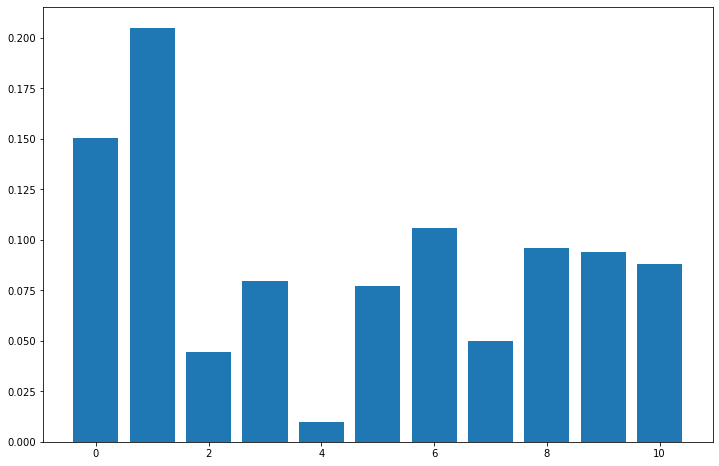

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
plt.figure(figsize=(12, 8))
plt.bar(np.arange(X.shape[1]), np.squeeze(np.abs(dtr.feature_importances_)))

> Finally we apply the tree regressor and after we have a 0.2 holdout on the testing data we get the MAE.

In [35]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
print('MAE on train:', mae(y_train, dtr.predict(X_train)))
print('MAE on test:', mae(y_test, dtr.predict(X_test)))

#print(metrics.mean_absolute_error(y_test, y_train))

MAE on train: 2.7017291066291695e-07
MAE on test: 0.17135940201729105


> The MAE we get is almost 0.16. That means that we have some diversion but not so big.
><br>
><br> Next thing we will try to do is to drop the feature "loudnsess" as it seems that is not of so big impotance compared to the others to see if that changes the MAE

In [36]:
#tracks3_z = tracks2.select_dtypes(include=[np.number]).dropna().apply(stats.zscore)
tracks3=tracks2.drop(['loudness'],1)
tracks3

,valence,danceability,energy,key,mode,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,time_signature
0,0.54,0.68,0.59,7,1,0.28,0.17,0.00,0.13,186.05,230453,4
1,0.74,0.72,0.76,9,0,0.05,0.41,0.00,0.18,101.97,251088,4
2,0.66,0.75,0.52,8,1,0.03,0.41,0.00,0.11,95.01,244960,4
3,0.09,0.73,0.45,0,1,0.06,0.06,0.00,0.33,117.97,245200,4
4,0.72,0.67,0.84,0,1,0.04,0.06,0.00,0.16,105.00,222041,4
...,...,...,...,...,...,...,...,...,...,...,...,...
13875,0.62,0.81,0.69,10,0,0.27,0.04,0.00,0.11,139.97,140369,4
13876,0.74,0.94,0.53,1,1,0.21,0.00,0.00,0.08,99.03,157520,4
13877,0.33,0.76,0.68,4,0,0.19,0.04,0.00,0.19,150.05,125320,4
13878,0.49,0.77,0.84,9,0,0.15,0.29,0.00,0.08,112.01,201271,4


> We then split again the data and repeat the previous procedure to check the decision tree regressor depth

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

X = tracks3.loc[:, 'danceability':'duration_ms']# Features
y = tracks3.iloc[:,[0]] #valence # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
#clf = clf.fit(X_train,y_train)
#importance = clf.feature_importances_
#y_pred = clf.predict(X_test)

parameters = [
  {'max_depth': list(range(1, 12))},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=13)
clf = GridSearchCV(DecisionTreeRegressor(criterion = 'mse'), parameters, cv=cv)

clf = clf.fit(X_train,y_train)
print(clf.best_estimator_)
print(clf.best_params_)

DecisionTreeRegressor(max_depth=6)
{'max_depth': 6}


> We then check again the MAE value

In [38]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import cross_val_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
dtr = DecisionTreeRegressor()
dtr.fit(X_train, y_train)
print('MAE on train:', mae(y_train, dtr.predict(X_train)))
print('MAE on test:', mae(y_test, dtr.predict(X_test)))

#print(metrics.mean_absolute_error(y_test, y_train))

MAE on train: 2.7017291066284194e-07
MAE on test: 0.17110785302593662


> We see that MAE now is worse so the removal of a feature is making the prediction procedure worse.
> <br>
> <br> The addition of features maybe could help to drop the MAE value to lower levels
> <br> Next we will try the XGBoost techniques

### Decision tree - XGBoost approach

> installing the library

In [39]:
conda install -c anaconda py-xgboost

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


> Creating the regressor and fitting the data

In [40]:
import xgboost as xgb
X = tracks2.loc[:, 'danceability':'duration_ms']# Features
y = tracks2.iloc[:,[0]] #valence # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

> Using the testing data to run predictions

In [41]:
preds = xgb_reg.predict(X_test)

In [42]:
MAE(y_test, preds)

0.13939790935631763

> After checking the MAE value we see an improvement of the model! 
> <br> From 0.16 we are now close to 0.14
><br> XGBoost seem a good solution
><br>
><br> Next we will check the Neural Network technique

### Neural Network approach

> installing and importing libraries

In [43]:
pip install tensorflow

In [44]:
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.svm import SVR

> We start by splitting our data and normalising them

In [45]:
X = tracks2.loc[:, 'danceability':'duration_ms']# Features
y = tracks2.iloc[:,[0]] #valence # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
normalizer = preprocessing.Normalization()
normalizer.adapt(np.array(X_train))
with np.printoptions(precision=2):
    print(normalizer.mean.numpy())
    print(normalizer.variance.numpy())
    print(normalizer.count.numpy())

[[ 6.88e-01  6.65e-01  5.34e+00 -6.32e+00  5.24e-01  1.54e-01  2.49e-01
   8.33e-03  1.81e-01  1.22e+02  2.07e+05]]
[[2.02e-02 2.65e-02 1.32e+01 5.89e+00 2.49e-01 1.73e-02 5.42e-02 3.95e-03
  2.32e-02 7.89e+02 2.59e+09]]
11104


> Then we will build the model using a function that we could maybe need later
> We choose 2 layers of 64 nodes

In [46]:
def build_compile_model():
    model = keras.Sequential([
        normalizer,
        layers.Dense(64, activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    
    return model

model = build_compile_model()

> We then check the summary of the model and notice that 21 parameters have not been trained.
><br> This is due to normalisation procedure

In [47]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 11)               23        
 n)                                                              
                                                                 
 dense (Dense)               (None, 64)                768       
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
Total params: 5,016
Trainable params: 4,993
Non-trainable params: 23
_________________________________________________________________


> Next step is the training procedure
><br>
><br> Chose 100 epochs. We will try later on if maybe we need less, but for now we will use 100

In [48]:
num_epochs = 100

history = model.fit(
    X_train, 
    y_train,
    epochs=num_epochs, 
    validation_split=0.2,
    verbose=1)

Epoch 1/100
278/278 [==============================] - 1s 3ms/step - loss: 0.1897 - val_loss: 0.1595
Epoch 2/100
278/278 [==============================] - 1s 2ms/step - loss: 0.1554 - val_loss: 0.1558
Epoch 3/100
278/278 [==============================] - 1s 2ms/step - loss: 0.1511 - val_loss: 0.1492
Epoch 4/100
278/278 [==============================] - 1s 2ms/step - loss: 0.1488 - val_loss: 0.1499
Epoch 5/100
278/278 [==============================] - 1s 2ms/step - loss: 0.1476 - val_loss: 0.1480
Epoch 6/100
278/278 [==============================] - 1s 2ms/step - loss: 0.1454 - val_loss: 0.1498
Epoch 7/100
278/278 [==============================] - 1s 2ms/step - loss: 0.1446 - val_loss: 0.1480
Epoch 8/100
278/278 [==============================] - 0s 2ms/step - loss: 0.1431 - val_loss: 0.1466
Epoch 9/100
278/278 [==============================] - 1s 2ms/step - loss: 0.1428 - val_loss: 0.1479
Epoch 10/100
278/278 [==============================] - 1s 2ms/step - loss: 0.1418 - val_lo

> Plotting the error of training and validation error we see that they are not close and there is a deviation that it does not improve over the epochs

In [49]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

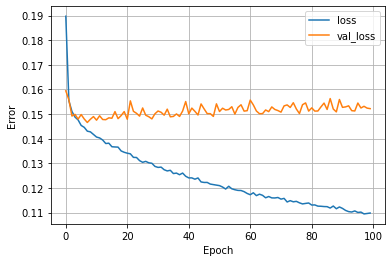

In [50]:
plot_loss(history)

> We evaluate the data to get the MAE and we see that it is similar to decision tree technique

In [51]:
model.evaluate(X_test, y_test, verbose=0)

0.15605661273002625

> Assigning an EarlyStopping so the procedure will stop if there is not any improvement in the training and repeating the above procedure

In [52]:
model = build_compile_model()
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
history = model.fit(X_train, y_train, epochs=num_epochs,
                    validation_split = 0.2, verbose=1, 
                    callbacks=[early_stop])

Epoch 1/100
278/278 [==============================] - 1s 2ms/step - loss: 0.1776 - val_loss: 0.1721
Epoch 2/100
278/278 [==============================] - 0s 1ms/step - loss: 0.1538 - val_loss: 0.1558
Epoch 3/100
278/278 [==============================] - 0s 1ms/step - loss: 0.1489 - val_loss: 0.1510
Epoch 4/100
278/278 [==============================] - 0s 1ms/step - loss: 0.1478 - val_loss: 0.1519
Epoch 5/100
278/278 [==============================] - 0s 1ms/step - loss: 0.1460 - val_loss: 0.1548
Epoch 6/100
278/278 [==============================] - 0s 1ms/step - loss: 0.1442 - val_loss: 0.1504
Epoch 7/100
278/278 [==============================] - 0s 2ms/step - loss: 0.1435 - val_loss: 0.1508
Epoch 8/100
278/278 [==============================] - 1s 2ms/step - loss: 0.1424 - val_loss: 0.1482
Epoch 9/100
278/278 [==============================] - 1s 2ms/step - loss: 0.1421 - val_loss: 0.1494
Epoch 10/100
278/278 [==============================] - 0s 1ms/step - loss: 0.1408 - val_lo

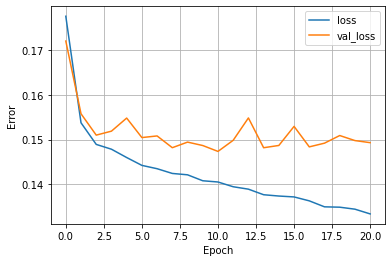

In [53]:
plot_loss(history)

In [54]:
model.evaluate(X_test, y_test, verbose=0)

0.15039165318012238

> We notice that we get a better MAE value now!
><br> We could try to optimize the NN method but probably for this kind of problems Neural Networks is not the optimal choice.
><br> They could work better in a classification problem
><br>
><br> We then try SVM method


### Support vector machine approach

> Fitting and predicting

In [55]:
svr = SVR().fit(X, y)
svr

C:\Users\cob_n\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [56]:
yfit = svr.predict(X)
yfit

array([0.47432546, 0.45312963, 0.45877187, ..., 0.53895839, 0.5093868 ,
       0.53426512])

In [57]:
print("MAE",MAE (y,yfit))

MAE 0.17676339627305673


> MAE value is not the best using this method

### Conclusions - Q2

From the above as we tested various methods and models we can deduce that Decision Tree with XGBoost was the best approach to model and predict our data!
* The simple Decision Tree regressor seems to underperform the XGBoost method.
* After trying also Neural Network we saw that the validation error comparing with the testing error does not produce a good plot that means maybe there are signs of overfitting.
<br>  Also maybe Neural Networks not the optimal choise for this kind of problems (better in classification(?)). Although we applied an early stop in the training procedure 
<br>  and we managed to lower the MAE value. 
* In the end, SVM method was also tried but it did not give better results in MAE,
<br>
<br> We could improve our models in general by adding features. Download more song analysis maybe. Although the dataset chosen stiil provides good predictors for the valence

##  Appendix 1:

### Neural Network attempt to find the best number of layers and parameters for our training model

> Below is an attempt to try and figure the best number of parameters for the NN approach. It does not seem to work any better but it predicts almost the same epochs and MAE

In [58]:
def create_model(layers,activation):
    model = keras.Sequential()
    for i, nodes in enumerate(layers):
        if i==0:
            model.add(Dense(nodes,input_dim=X_train.shape[1]))
            model.add(Activation(activation))
        else:
            model.add(Dense(nodes))
            model.add(Activation(activation))
    model.add(Dense(1))
    model.compile(loss='mean_absolute_error',
                optimizer='adam', metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model,verbose=0)

<ipython-input-58-1b04c2b8d6ad>:15: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasClassifier(build_fn=create_model,verbose=0)


In [59]:
model

In [60]:
layers = [[20], [40,20], [45, 30, 15]]
activations = [ 'sigmoid', 'relu']
param_grid = dict(layers=layers, activation = activations, batch_size = [64, 256], epochs = [30])
grid = GridSearchCV(estimator=model, param_grid = param_grid)

> It takes some time to run!

In [61]:
grid_result = grid.fit(X_train, y_train)

In [62]:
[grid_result.best_score_,grid_result.best_params_]

[0.0,
 {'activation': 'sigmoid', 'batch_size': 64, 'epochs': 30, 'layers': [20]}]

In [63]:
import tensorflow as tf
from keras.wrappers.scikit_learn import KerasClassifier
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers.experimental import preprocessing
from sklearn.svm import SVR

In [64]:
def build_compile_model():
    model = keras.Sequential([
        normalizer,
        layers.Dense(64, activation='sigmoid'),
        layers.Dense(1)
    ])

    model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(0.001))
    
    return model

model = build_compile_model()

> We then check the summary of the model and notice that 21 parameters have not been trained.
><br> This is due to normalisation procedure

In [65]:
model.summary()

Model: "sequential_63"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 11)               23        
 n)                                                              
                                                                 
 dense_188 (Dense)           (None, 64)                768       
                                                                 
 dense_189 (Dense)           (None, 1)                 65        
                                                                 
Total params: 856
Trainable params: 833
Non-trainable params: 23
_________________________________________________________________


> Next step is the training procedure
><br>
><br> Chose 100 epochs. We will try later on if maybe we need less, but for now we will use 100

In [66]:
num_epochs = 30

history = model.fit(
    X_train, 
    y_train,
    epochs=num_epochs, 
    validation_split=0.2,
    verbose=1)

Epoch 1/30
278/278 [==============================] - 1s 2ms/step - loss: 0.1596 - val_loss: 0.1517
Epoch 2/30
278/278 [==============================] - 0s 1ms/step - loss: 0.1549 - val_loss: 0.1546
Epoch 3/30
278/278 [==============================] - 0s 1ms/step - loss: 0.1543 - val_loss: 0.1538
Epoch 4/30
278/278 [==============================] - 0s 1ms/step - loss: 0.1543 - val_loss: 0.1562
Epoch 5/30
278/278 [==============================] - 0s 1ms/step - loss: 0.1539 - val_loss: 0.1508
Epoch 6/30
278/278 [==============================] - 0s 1ms/step - loss: 0.1536 - val_loss: 0.1516
Epoch 7/30
278/278 [==============================] - 0s 1ms/step - loss: 0.1530 - val_loss: 0.1511
Epoch 8/30
278/278 [==============================] - 0s 1ms/step - loss: 0.1534 - val_loss: 0.1530
Epoch 9/30
278/278 [==============================] - 0s 1ms/step - loss: 0.1543 - val_loss: 0.1518
Epoch 10/30
278/278 [==============================] - 0s 1ms/step - loss: 0.1536 - val_loss: 0.1524

> Plotting the error of training and validation error

In [67]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Error')
    plt.legend()
    plt.grid(True)

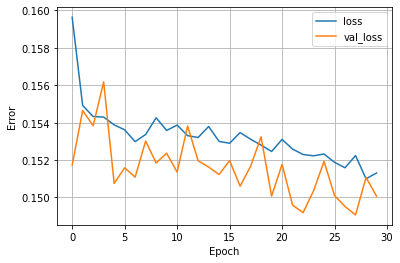

In [68]:
plot_loss(history)

> We evaluate the data to get the MAE

In [69]:
model.evaluate(X_test, y_test, verbose=0)

0.15194405615329742

In [70]:
#import sklearn.metrics as sm
#print("Mean absolute error =", round(sm.mean_absolute_error(y_test, y_pred), 2)) 
#print("Mean squared error =", round(sm.mean_squared_error(y_test, y_test_pred), 2)) 
#print("Median absolute error =", round(sm.median_absolute_error(y_test, y_test_pred), 2)) 
#print("Explain variance score =", round(sm.explained_variance_score(y_test, y_test_pred), 2)) 
#print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))

##  Appendix 2:

### Working with the extra dataset

> I downloaded the extra file and imported the data

In [71]:
extra_tracks = pd.read_csv("spotify_ids.txt", sep=" ",header=None, names=["song_id"])
extra_tracks

,song_id
0,7lPN2DXiMsVn7XUKtOW1CS
1,5QO79kh1waicV47BqGRL3g
2,0VjIjW4GlUZAMYd2vXMi3b
3,4MzXwWMhyBbmu6hOcLVD49
4,5Kskr9LcNYa0tpt5f0ZEJx
...,...
1157,4lUmnwRybYH7mMzf16xB0y
1158,1fzf9Aad4y1RWrmwosAK5y
1159,3E3pb3qH11iny6TFDJvsg5
1160,3yTkoTuiKRGL2VAlQd7xsC


> Repeating the procedure for the configuration and the access for the spotify dashboard

In [72]:
from spotify_config import config

client_credentials_manager = SpotifyClientCredentials(config['client_id'],
                                                      config['client_secret'])
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
#sp.trace = False

In [73]:
len(extra_tracks['song_id'].unique())

1162

>Creating again a blank list that we will populate with the features of the songs but with the values for the specific extra tracks provided.

In [74]:
features2 = {}
extra_ids = list(extra_tracks['song_id'].unique())

In [75]:
#analysis = {}
#all_track_ids2 = list(all_charts['song_id'].unique())

> Getting the songs from the Spotify API

In [76]:
start = 0
num_tracks = 100
while start < len(extra_ids):
    print(f'getting from {start} to {start+num_tracks}')
    tracks_batch = extra_ids[start:start+num_tracks]
    features_batch2 = sp.audio_features(tracks_batch)
    features2.update({ track_id : track_features 
                     for track_id, track_features in zip(tracks_batch, features_batch2) })
    start += num_tracks

getting from 0 to 100
getting from 100 to 200
getting from 200 to 300
getting from 300 to 400
getting from 400 to 500
getting from 500 to 600
getting from 600 to 700
getting from 700 to 800
getting from 800 to 900
getting from 900 to 1000
getting from 1000 to 1100
getting from 1100 to 1200


> And creating a dataframe including the data.

In [77]:
extra_tracks2 = pd.DataFrame.from_dict(features2, orient='index')
extra_tracks2=extra_tracks2.reset_index().rename(columns={'index' : 'song_id'})
extra_tracks2

,song_id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
0,7lPN2DXiMsVn7XUKtOW1CS,0.58,0.44,10,-8.76,1,0.06,0.72,0.00,0.10,0.13,143.87,audio_features,7lPN2DXiMsVn7XUKtOW1CS,spotify:track:7lPN2DXiMsVn7XUKtOW1CS,https://api.spotify.com/v1/tracks/7lPN2DXiMsVn...,https://api.spotify.com/v1/audio-analysis/7lPN...,242014,4
1,5QO79kh1waicV47BqGRL3g,0.68,0.83,0,-5.49,1,0.03,0.02,0.00,0.54,0.64,118.05,audio_features,5QO79kh1waicV47BqGRL3g,spotify:track:5QO79kh1waicV47BqGRL3g,https://api.spotify.com/v1/tracks/5QO79kh1waic...,https://api.spotify.com/v1/audio-analysis/5QO7...,215627,4
2,0VjIjW4GlUZAMYd2vXMi3b,0.51,0.73,1,-5.93,1,0.06,0.00,0.00,0.09,0.33,171.00,audio_features,0VjIjW4GlUZAMYd2vXMi3b,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4
3,4MzXwWMhyBbmu6hOcLVD49,0.73,0.57,4,-10.06,0,0.05,0.40,0.00,0.11,0.14,109.93,audio_features,4MzXwWMhyBbmu6hOcLVD49,spotify:track:4MzXwWMhyBbmu6hOcLVD49,https://api.spotify.com/v1/tracks/4MzXwWMhyBbm...,https://api.spotify.com/v1/audio-analysis/4MzX...,205090,4
4,5Kskr9LcNYa0tpt5f0ZEJx,0.91,0.39,4,-7.64,0,0.05,0.45,0.00,0.14,0.20,104.95,audio_features,5Kskr9LcNYa0tpt5f0ZEJx,spotify:track:5Kskr9LcNYa0tpt5f0ZEJx,https://api.spotify.com/v1/tracks/5Kskr9LcNYa0...,https://api.spotify.com/v1/audio-analysis/5Ksk...,205458,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,4lUmnwRybYH7mMzf16xB0y,0.60,0.65,9,-5.17,1,0.34,0.14,0.00,0.14,0.19,134.00,audio_features,4lUmnwRybYH7mMzf16xB0y,spotify:track:4lUmnwRybYH7mMzf16xB0y,https://api.spotify.com/v1/tracks/4lUmnwRybYH7...,https://api.spotify.com/v1/audio-analysis/4lUm...,257428,4
1158,1fzf9Aad4y1RWrmwosAK5y,0.59,0.85,4,-6.43,1,0.03,0.17,0.00,0.05,0.77,93.00,audio_features,1fzf9Aad4y1RWrmwosAK5y,spotify:track:1fzf9Aad4y1RWrmwosAK5y,https://api.spotify.com/v1/tracks/1fzf9Aad4y1R...,https://api.spotify.com/v1/audio-analysis/1fzf...,187310,4
1159,3E3pb3qH11iny6TFDJvsg5,0.75,0.66,0,-6.81,1,0.27,0.18,0.00,0.19,0.32,83.00,audio_features,3E3pb3qH11iny6TFDJvsg5,spotify:track:3E3pb3qH11iny6TFDJvsg5,https://api.spotify.com/v1/tracks/3E3pb3qH11in...,https://api.spotify.com/v1/audio-analysis/3E3p...,209299,4
1160,3yTkoTuiKRGL2VAlQd7xsC,0.58,0.84,0,-4.92,1,0.08,0.06,0.00,0.07,0.48,104.97,audio_features,3yTkoTuiKRGL2VAlQd7xsC,spotify:track:3yTkoTuiKRGL2VAlQd7xsC,https://api.spotify.com/v1/tracks/3yTkoTuiKRGL...,https://api.spotify.com/v1/audio-analysis/3yTk...,202204,4


> Re-arranging the columns so valence becomes the first column.

In [78]:
extra_tracks2=extra_tracks2[['valence' ,'danceability', 'energy','key','loudness','mode','speechiness','acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms']]
extra_tracks2
extra_tracks2.to_csv('extra.csv')

> Splitting the data to target (dependent variable and features)

In [79]:
X = extra_tracks2.loc[:, 'danceability':'duration_ms']# Features
y = extra_tracks2.iloc[:,[0]] #valence # Target variable
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

#clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
#clf = clf.fit(X_train,y_train)
#importance = clf.feature_importances_
#y_pred = clf.predict(X_test)

#parameters = [
#  {'max_depth': list(range(1, 12))},
# ]

#cv = KFold(n_splits=5, shuffle=True, random_state=13)
#clf = GridSearchCV(DecisionTreeRegressor(criterion = "mse"), parameters, cv=cv)

#clf = clf.fit(X_train,y_train)
#print(clf.best_estimator_)
#print(clf.best_params_)

> Applying the best model which is the XGBoost approach

In [80]:
import xgboost as xgb
X = tracks2.loc[:, 'danceability':'duration_ms']# Features
y = tracks2.iloc[:,[0]] #valence # Target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

xgb_reg = xgb.XGBRegressor()
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [81]:
preds = xgb_reg.predict(X)

In [82]:
MAE(y, preds)

0.09404673003079073

> We see that it gives a good MAE value

In [83]:
df1 = pd.DataFrame(preds, columns=['Valence'])
df1

,Valence
0,0.45
1,0.65
2,0.52
3,0.23
4,0.66
...,...
13875,0.48
13876,0.65
13877,0.42
13878,0.60
